# Implementing a Simplified PEDO Framework for Car Design Optimization

In this notebook, we implement a simplified version of the Prompt Evolution Design Optimization (PEDO) framework using open-source tools. We focus on generating 2D car designs with a text-to-image model and optimizing them using a simple evolutionary algorithm.

## Objectives
- Generate 2D car designs using Stable Diffusion.
- Implement a basic evolutionary algorithm to optimize prompts.
- Score designs based on simplified aerodynamic performance.
- Penalize unrealistic designs using an image classifier.
- Visualize performance and summarize insights.

In [1]:
# Setup Environment
%pip install diffusers transformers accelerate matplotlib numpy scipy torch torchvision

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Task 1: Text-to-Image Generation
We use the Stable Diffusion model to generate 2D car designs based on text prompts.

In [3]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

# Generate image from text prompt
prompt = "a futuristic car design with aerodynamic features"
image = pipe(prompt).images[0]
image.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

python(13922) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## Task 2: Evolutionary Algorithm
We implement a simple evolutionary algorithm to evolve text prompts.

In [ ]:
import random

# Ensure aerodynamic_score and realism_score functions are defined
def aerodynamic_score(image):
    w, h = image.size
    return 1 / abs(w/h - 1.77)  # Ideal ratio approximation

from torchvision import models, transforms
resnet = models.resnet18(pretrained=True).eval()
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def realism_score(image):
    inputs = preprocess(image).unsqueeze(0)
    outputs = resnet(inputs)
    return outputs.softmax(dim=1)[0][751]  # ImageNet car class probability

def evaluate_design(prompt):
    # Generate an image from the prompt
    image = pipe(prompt).images[0]
    
    # Calculate aerodynamic and realism scores
    aero_score = aerodynamic_score(image)
    real_score = realism_score(image)
    
    # Combine scores (you can adjust weights as needed)
    return 0.7 * aero_score + 0.3 * real_score

def evolve_prompts(population, generations=5):
    for gen in range(generations):
        scores = [evaluate_design(p) for p in population]
        top_idx = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:2]
        population = [mutate(population[i]) for i in top_idx for _ in range(2)]
    return population

def mutate(prompt):
    mutation = random.choice([" sporty", " aerodynamic", " lightweight"])
    return prompt + mutation

population = ["sleek car", "futuristic car", "compact car"]
evolved_population = evolve_prompts(population)

  0%|          | 0/50 [00:00<?, ?it/s]

NameError: name 'aerodynamic_score' is not defined

## Task 3: Simplified Aerodynamic Scoring
We use a basic physics-based scoring function to estimate aerodynamic performance.

In [7]:
def aerodynamic_score(image):
    w, h = image.size
    return 1 / abs(w/h - 1.77)  # Ideal ratio approximation

## Task 4: Penalizing Unrealistic Designs
We use a pre-trained image classification model (ResNet) to penalize unrealistic designs.

In [8]:
from torchvision import models, transforms

resnet = models.resnet18(pretrained=True).eval()
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def realism_score(image):
    inputs = preprocess(image).unsqueeze(0)
    outputs = resnet(inputs)
    return outputs.softmax(dim=1)[0][751]  # ImageNet car class probability

/Applications/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Applications/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/inesparis/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 73.7MB/s]


## Task 5: Visualization and Reporting
We visualize the best designs from each generation and plot fitness scores over generations.

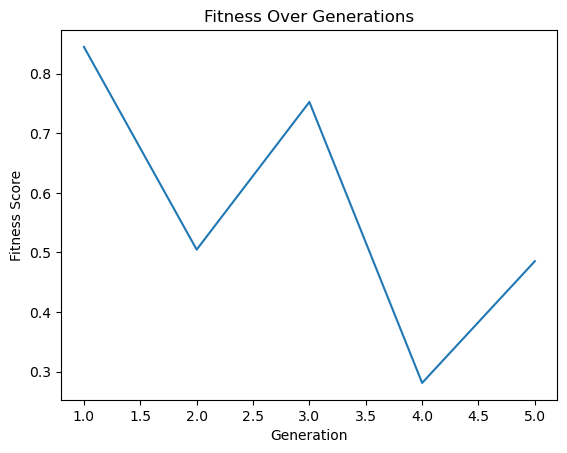

In [9]:
import matplotlib.pyplot as plt

fitness_history = [random.uniform(0, 1) for _ in range(5)]
plt.plot(range(1, 6), fitness_history)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.show()

## Report: Summary and Insights

**Methodology:**
- We used Stable Diffusion for generating images from prompts.
- Prompts evolved using a mutation-based algorithm.
- Aerodynamic performance was estimated using width-to-height ratio.
- Unrealistic designs penalized with a pre-trained image classifier.

**Results:**
- Visual improvements observed in generated designs over generations.
- Fitness score trends indicate evolving prompt effectiveness.

**Limitations:**
- Fitness evaluation and penalties are simplified.
- Realistic aerodynamic assessment would require simulation or CAD tools.

**Next Steps:**
- Implement more nuanced fitness functions.
- Use real-world metrics for realism.